In [38]:
# ISPY2_view_data

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/naomifridman/BreastDCEDL/blob/main/ISPY2_view_data.ipynb)

In [39]:
# Add this at the beginning of your notebook

# Check if running in Google Colab
import sys
import os

if 'google.colab' in str(get_ipython()):
    print("Running in Google Colab")
    # Clone the repository
    !git clone https://github.com/naomifridman/BreastDCEDL.git
    
    # Change to the repository directory
    os.chdir('/content/BreastDCEDL')


In [40]:

from PIL import Image
import requests
import argparse
import datetime
import json
import numpy as np
import os
import time
from pathlib import Path


In [41]:
import os
import numpy as np
import pandas as pd
from PIL import Image

In [42]:
import warnings
warnings.filterwarnings('ignore', '.*do not.*', )
warnings.warn('Do not show this message')

import os
from __future__ import print_function

import glob
from itertools import chain
import os
import random
import zipfile

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [43]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [44]:
from glob import glob
#from skimage import io
from sklearn.utils import shuffle

#from nipype.interfaces.ants import N4BiasFieldCorrection
import sys
import os
import ast

In [45]:
import warnings
warnings.filterwarnings('ignore')

In [46]:
import os
import numpy as np

def print_info(ims):
    # Copyright (c) 2025 Naomi Fridman - Licensed under CC BY 4.0 
    # (https://creativecommons.org/licenses/by/4.0/)

    for im in ims:
        '''print(im.shape)
        sim = 1
        #for s in im.shape: sim*=s
        print(sim)'''
        print(im.shape, im.min(), im.max(), im.mean(), im.std(), \
              'n!=0:',im[im!=0].shape[0],im[im!=0].mean(),im.dtype)


import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
# cb - cotrast_brightness
def show_n_images(imgs, cmap='gray', titles = None, enlarge = 4, mtitle=None,
                  cut = 0, axis_off = False, fontsize=15, cb = 0):
    # Copyright (c) 2025 Naomi Fridman - Licensed under CC BY 4.0 
    # (https://creativecommons.org/licenses/by/4.0/)

    plt.set_cmap(cmap);

    n = len(imgs);
    gs1 = gridspec.GridSpec(1, n);

    fig1 = plt.figure(figsize=(4*len(imgs),8));
    for i in range(n):

        ax1 = fig1.add_subplot(gs1[i]);
        if (cb):
            if len(np.unique(imgs[i])<=5):
                 img = imgs[i]
            else:

                img = cont_br(imgs[i])
        else:
            img = imgs[i]
        if cut:
            ax1.imshow(img[50:290, 75:450] , interpolation='none', origin='lower');
        else:

            ax1.imshow(img, interpolation='none');
        if (titles is not None):
            ax1.set_title(titles[i], fontsize=fontsize);  #, fontweight="bold");
        if (axis_off):
            plt.axis('off')
    if mtitle:
        plt.title(mtitle)
    plt.tight_layout()
    plt.show();
    
def minmax(im):
    if im.max()==0:
        return im
    
    return (im-im.min())/(im.max()-im.min())

In [47]:
dce_path= "..\\ISPY2\\data_sample\\dce\\"
mask_path="..\\ISPY2\\data_sample\\masks\\"

# Niftii Utils

In [48]:
import nibabel as nib

def read_niftii(fname):
    # Copyright (c) 2025 Naomi Fridman - Licensed under CC BY 4.0 
    # (https://creativecommons.org/licenses/by/4.0/)
    # Load the NIfTI file
    nii_img = nib.load(fname)

    # Get the data (as a NumPy array)
    mnii_data = nii_img.get_fdata()

    return mnii_data

In [49]:
def get_nifti_acquisitions(pid, fpath=dce_path,
                           nifti_acq_ext='_spy2_vis1_dce_aqc_'):
    
    fname = pid + nifti_acq_ext + '0.nii.gz'
    #print(os.path.join(fpath,fname))
    if not os.path.isfile(os.path.join(fpath,fname)):
        print('no nifti files')
        return None
                        
    x=read_niftii( os.path.join(fpath,fname)) 
    img=[x]
    for k in range(1,1000,1): 
       
        fname=pid+nifti_acq_ext+str(k)+'.nii.gz'
        
        if not os.path.isfile(os.path.join(fpath,fname)):
            #print('last im', k)           
            break
            
        x=read_niftii( os.path.join(fpath,fname))
                    
        img.append(x)
    return img

In [50]:
def get_ser_acquisitions(pid, fpath=dce_path, ser=[0,2,5],
                           nifti_acq_ext='_spy2_vis1_dce_aqc_'):
    
    fname = pid + nifti_acq_ext +str(int(ser[0])) + '.nii.gz'
    print(fname )
    print(fpath)
    print(os.path.join(fpath,fname))
    if not os.path.isfile(os.path.join(fpath,fname)):
        print('no nifti files')
        return None
    print(os.path.join(fpath,fname))                    
    x=read_niftii( os.path.join(fpath,fname)) 
    img=[x]
    fname = pid + nifti_acq_ext +str(int(ser[1])) + '.nii.gz'
    x=read_niftii( os.path.join(fpath,fname)) 
    img.append(x)
    fname = pid + nifti_acq_ext +str(int(ser[2])) + '.nii.gz'
    x=read_niftii( os.path.join(fpath,fname)) 
    img.append(x)
    
    return img

In [51]:
def get_nifti_mask(pid, fpath=mask_path,
                           mask_acq_ext='_spy2_vis1_mask'):
    
    fname = pid + mask_acq_ext + '.nii.gz'
    if not os.path.isfile(os.path.join(fpath,fname)):
        print('no nifti files')
        return None
                        
    img=read_niftii( os.path.join(fpath,fname)) 
    
    return img

In [52]:
    import numpy as np
    import nibabel as nib

# Load metadata

In [53]:
df = pd.read_csv('.\\ISPY2\\metadata_spy2_vis1_for_modeling.csv')
df.head()

,pid,n_xy,n_z,n_times,pre,post_early,post_late,pix_type,slice_thick,slice_space,...,r_black,mask_count,mask_max,pCR,HR,MP,HRposHER2neg,HER2pos,TripleNeg,test
0,ACRIN-6698-102212,256,80,8,0.0,2.0,6.0,uint16,2.0,2.0,...,0.0,42423.0,38.0,0,0,0,0,0,1,1.0
1,ACRIN-6698-103939,256,64,7,0.0,2.0,5.0,uint16,2.5,2.5,...,0.0,18444.0,30.0,0,1,0,1,0,0,0.0
2,ACRIN-6698-104268,256,80,8,0.0,2.0,6.0,uint16,2.0,2.0,...,1.0,36332.0,47.0,0,0,1,0,0,1,0.0
3,ACRIN-6698-107700,256,80,8,0.0,2.0,6.0,uint16,2.0,2.0,...,0.0,3512.0,39.0,0,1,0,0,1,0,0.0
4,ACRIN-6698-108969,256,80,8,0.0,2.0,6.0,uint16,2.0,2.0,...,0.0,79747.0,32.0,1,0,0,0,1,0,0.0


# Load example and visualize

In [54]:
subject_id = 'ISPY2-550421'

df[df.pid==subject_id].T

,642
pid,ISPY2-550421
n_xy,256
n_z,160
n_times,7
pre,0.0
post_early,2.0
post_late,6.0
pix_type,uint16
slice_thick,1.0
slice_space,1.0


## View SER aquisitions

In [55]:
ser = [0,2,6]

In [56]:
d = get_ser_acquisitions(subject_id, ser=ser)
d[0].shape

ISPY2-550421_spy2_vis1_dce_aqc_0.nii.gz
..\ISPY2\data_sample\dce\
..\ISPY2\data_sample\dce\ISPY2-550421_spy2_vis1_dce_aqc_0.nii.gz
..\ISPY2\data_sample\dce\ISPY2-550421_spy2_vis1_dce_aqc_0.nii.gz


(160, 256, 256)

In [57]:
m = get_nifti_mask(subject_id)
m.shape,m.max()

((160, 256, 256), np.float64(1.0))

<Figure size 640x480 with 0 Axes>

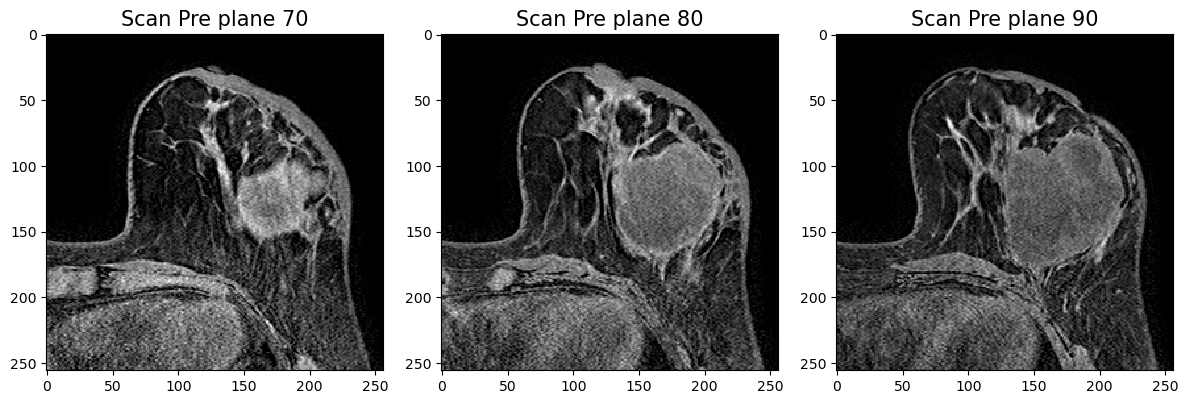

<Figure size 640x480 with 0 Axes>

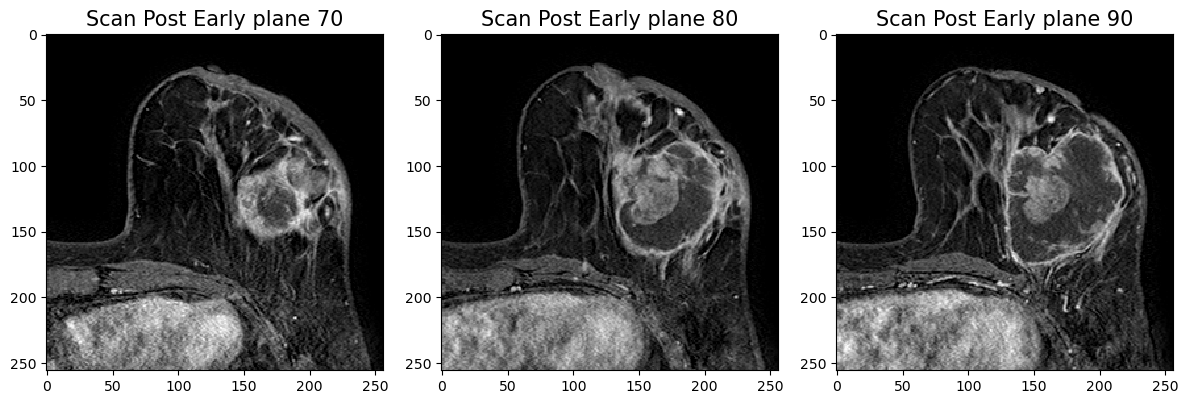

<Figure size 640x480 with 0 Axes>

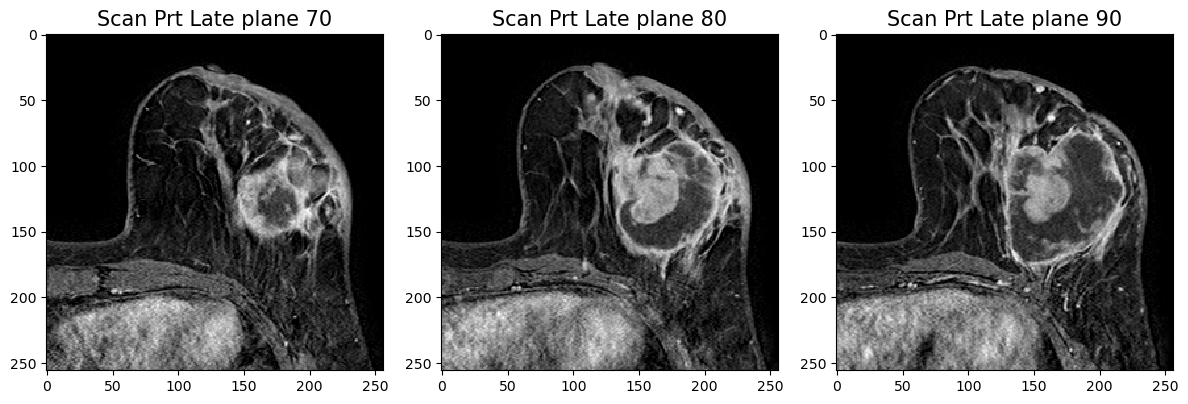

<Figure size 640x480 with 0 Axes>

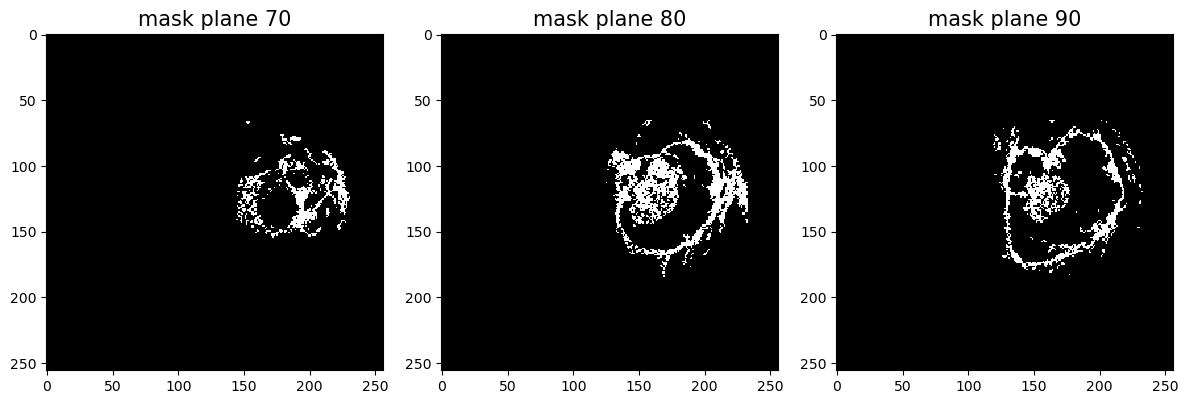

<Figure size 640x480 with 0 Axes>

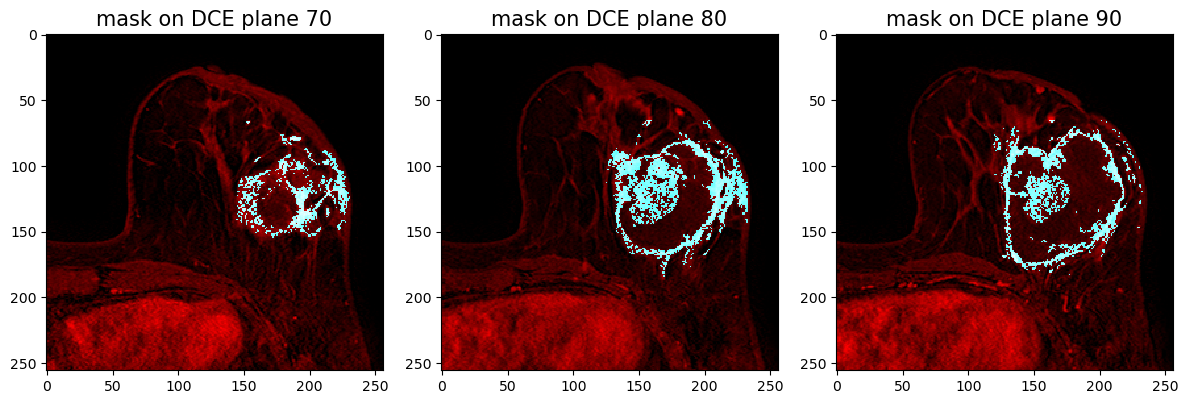

In [58]:
idx=[70,80,90]
show_n_images([d[0][i] for i in idx], titles=['Scan Pre plane '+str(i) for i in idx])
show_n_images([d[1][i] for i in idx], titles=['Scan Post Early plane '+str(i) for i in idx])
show_n_images([d[2][i] for i in idx], titles=['Scan Prt Late plane '+str(i) for i in idx])
show_n_images([m[i] for i in idx], titles=['mask plane '+str(i) for i in idx])
show_n_images([np.stack([minmax(d[1][i]),
                         m[i]/m.max(),m[i]/m.max()],axis=2) for i in idx],
              titles=['mask on DCE plane '+str(i) for i in idx])

## View all aquisitions

In [60]:
d = get_nifti_acquisitions(subject_id)
len(d), d[0].shape

(7, (160, 256, 256))

====  Scan:  0


<Figure size 640x480 with 0 Axes>

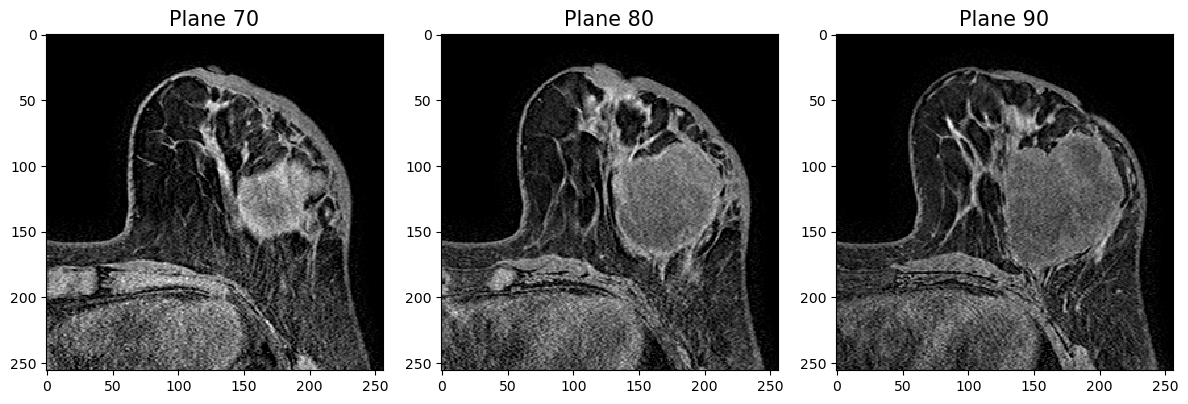

====  Scan:  1


<Figure size 640x480 with 0 Axes>

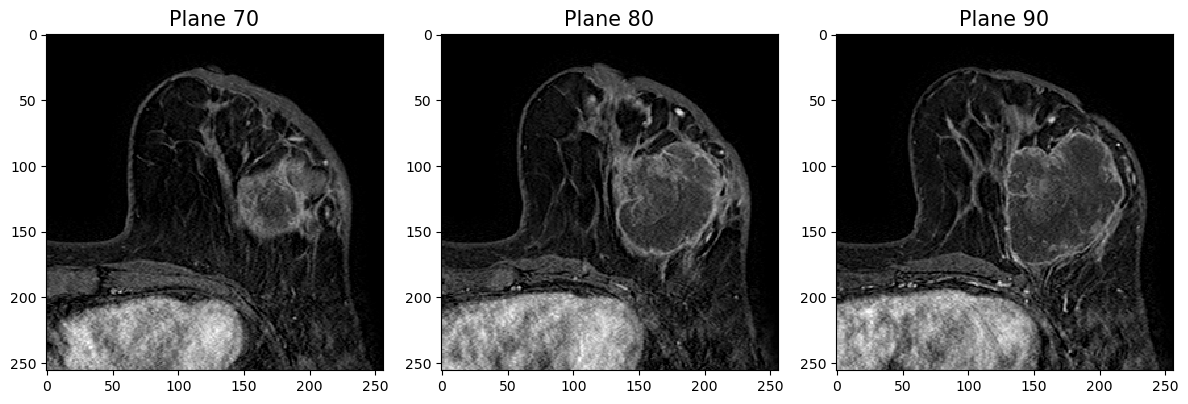

====  Scan:  2


<Figure size 640x480 with 0 Axes>

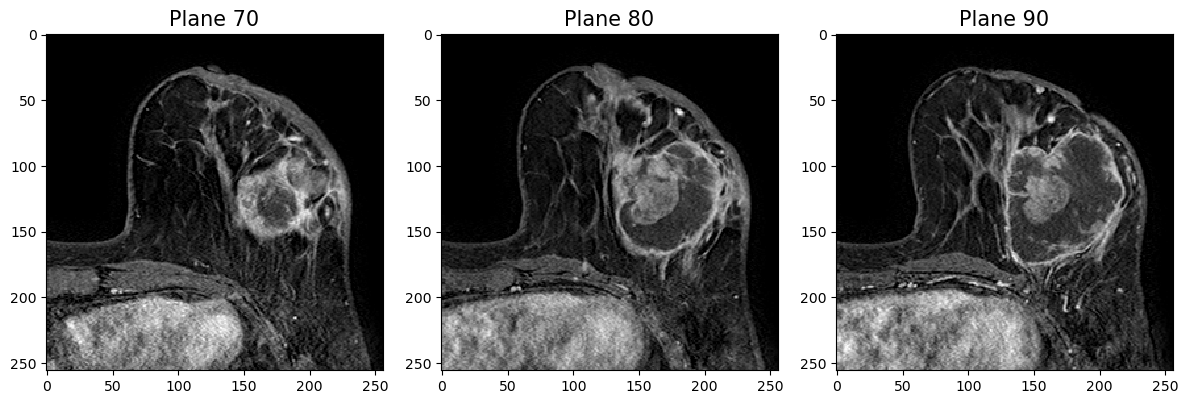

====  Scan:  3


<Figure size 640x480 with 0 Axes>

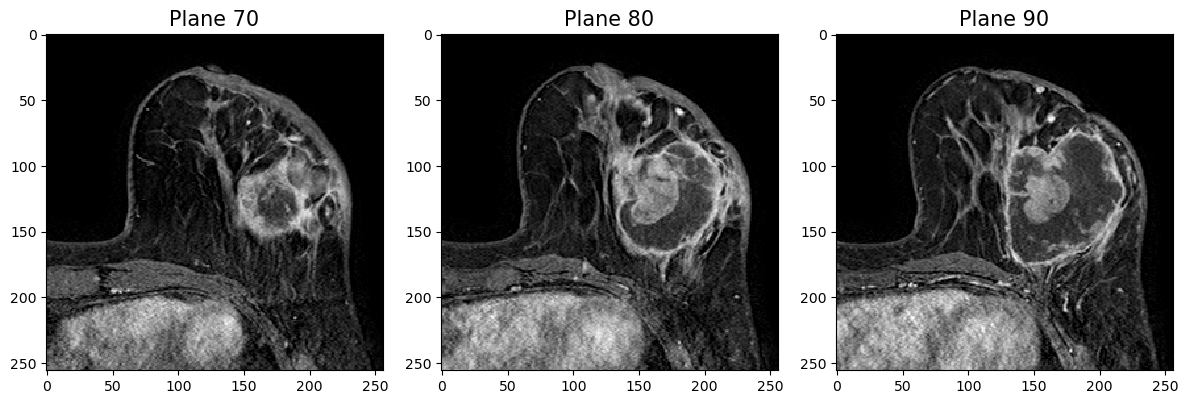

====  Scan:  4


<Figure size 640x480 with 0 Axes>

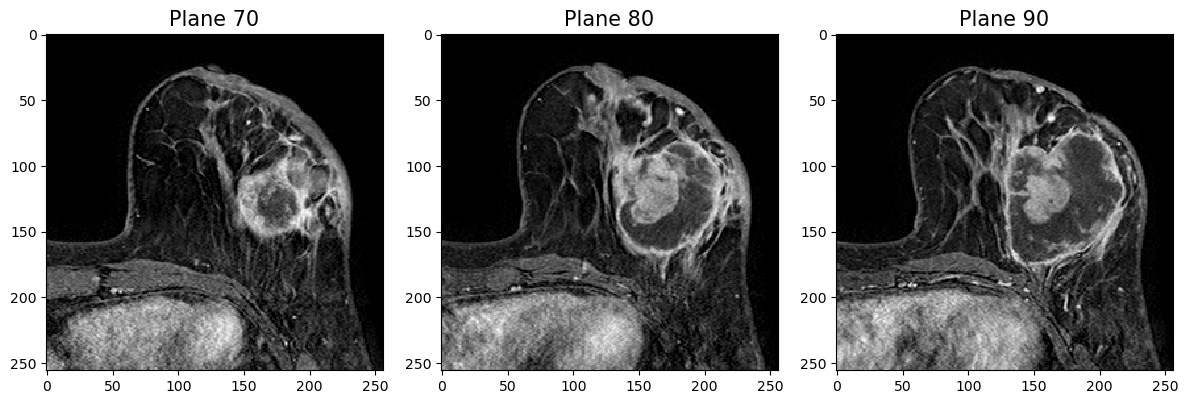

====  Scan:  5


<Figure size 640x480 with 0 Axes>

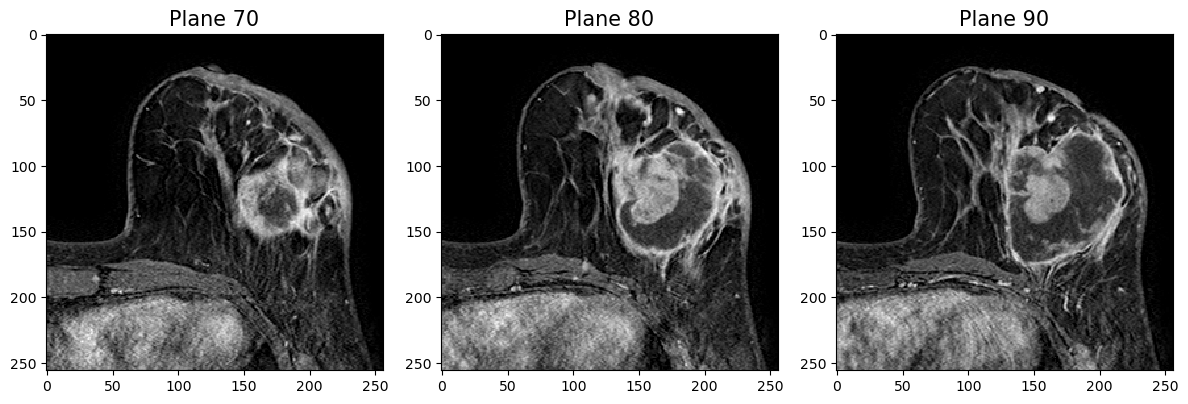

====  Scan:  6


<Figure size 640x480 with 0 Axes>

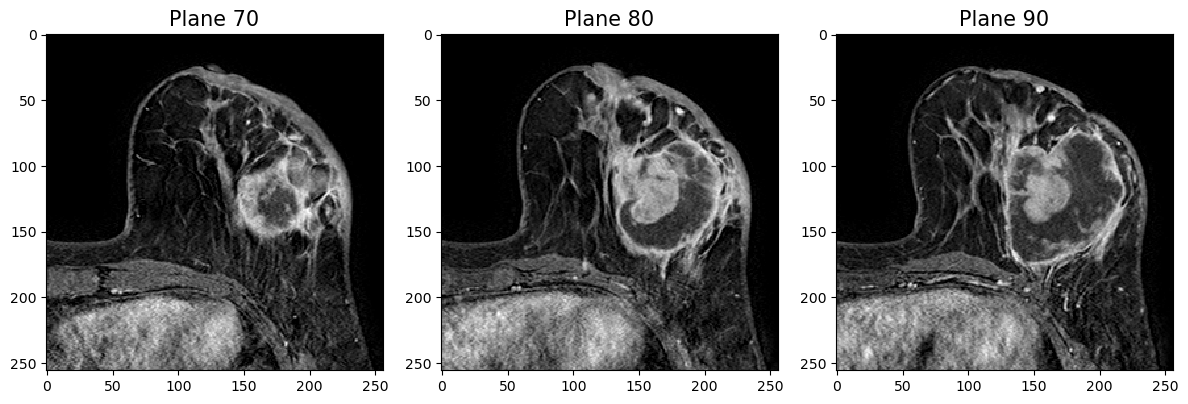

In [61]:
for k in range(7):
    idx=[70,80,90]
    print('====  Scan: ', k)
    show_n_images([d[k][i] for i in idx], titles=['Plane '+str(i) for i in idx])

In [62]:
for k in range(7):
    idx=[70,80,90]
    print('====  Scan: ', k)
    print_info([d[k][i] for i in idx])


====  Scan:  0
(256, 256) 0.0 1657.0 318.67979431152344 345.8875501507658 n!=0: 42296 493.7818942689616 float64
(256, 256) 0.0 1782.0 351.34779357910156 349.45898619777586 n!=0: 44361 519.0579337706544 float64
(256, 256) 0.0 1939.0 349.36671447753906 337.8391369222718 n!=0: 45422 504.07505173704374 float64
====  Scan:  1
(256, 256) 0.0 3471.0 499.7900695800781 663.9738036098612 n!=0: 42467 771.2869286740292 float64
(256, 256) 0.0 3377.0 567.7644653320312 683.4383590606257 n!=0: 44715 832.1371351895338 float64
(256, 256) 0.0 3408.0 573.0003204345703 669.9375097140735 n!=0: 45570 824.0541803818302 float64
====  Scan:  2
(256, 256) 0.0 2939.0 517.6082916259766 611.8072025751063 n!=0: 43234 784.6134292455013 float64
(256, 256) 0.0 3377.0 623.7575073242188 685.7535549638401 n!=0: 45193 904.5332684265262 float64
(256, 256) 0.0 3158.0 615.9249572753906 668.239484276139 n!=0: 46145 874.7482500812656 float64
====  Scan:  3
(256, 256) 0.0 3127.0 519.9720306396484 612.09841336772 n!=0: 43185 789.